In [1]:
rm(list = ls())
library(Seurat)
library(monocle3)
library(dplyr)
library(BiocParallel)
library(ggplot2)
library(qs)

Loading required package: SeuratObject

Loading required package: sp



‘SeuratObject’ was built with package ‘Matrix’ 1.7.3 but the current
version is 1.7.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unspli

In [12]:
seurat.data = qread("/home/guoliming/Brown/ALI_CRL/ALI/Macrophages/Outdata/Sub_annotion.qs")

In [13]:
# seurat.data  <- subset(seurat.data, subset = celltype %in% c("Macrophages_c2", "Macrophages_c9", "Macrophages_c10","Macrophages_c5"))

In [14]:
levels(seurat.data)

[1] "Macrophages_c4"       "Macrophages_c0"       "Macrophages_c1"      
 [4] "Macrophages_c3(Epi)"  "Macrophages_c6"       "Macrophages_c11"     
 [7] "Macrophages_c7(Neu)"  "Macrophages_c10"      "Macrophages_c8(NK/T)"
[10] "Macrophages_c12(Neu)" "Macrophages_c2"       "Macrophages_c5"      
[13] "Macrophages_c9"

In [15]:
scRNA <- subset(seurat.data, subset = !grepl("\\(", celltype))


In [16]:
levels(scRNA)

[1] "Macrophages_c4"  "Macrophages_c0"  "Macrophages_c1"  "Macrophages_c6" 
[5] "Macrophages_c11" "Macrophages_c10" "Macrophages_c2"  "Macrophages_c5" 
[9] "Macrophages_c9"

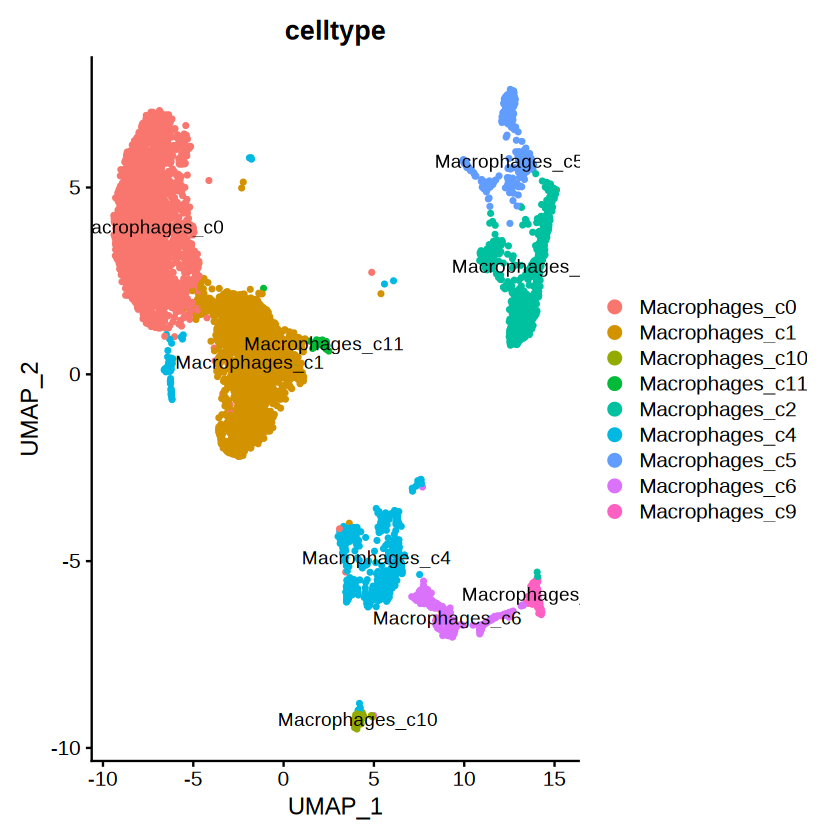

In [17]:
DimPlot(scRNA,pt.size = 0.8,group.by = "celltype",label = T)

In [18]:
levels(Idents(scRNA)) #打出来细胞类型供复制
# [1] "CD4+ T-cells"      "Fibroblasts"       "B-cells"          
# [4] "CD8+ T-cells"      "Neutrophils"       "Monocytes"        
# [7] "Adipocytes"        "NK cells"          "Endothelial cells"
 
# 重设等级也可以不设
# scRNA$celltype <- factor(scRNA$celltype,
#                          levels = c("Endothelial cells"))
 
Idents(scRNA) <- scRNA$celltype

[1] "Macrophages_c4"  "Macrophages_c0"  "Macrophages_c1"  "Macrophages_c6" 
[5] "Macrophages_c11" "Macrophages_c10" "Macrophages_c2"  "Macrophages_c5" 
[9] "Macrophages_c9"

In [19]:
expression_matrix <- GetAssayData(scRNA, assay = 'RNA',layer  = 'counts')
cell_metadata <- scRNA@meta.data 
gene_annotation <- data.frame(gene_short_name = rownames(expression_matrix))
rownames(gene_annotation) <- rownames(expression_matrix)
cds <- new_cell_data_set(expression_matrix,
                         cell_metadata = cell_metadata,
                         gene_metadata = gene_annotation)

In [10]:
cds <- preprocess_cds(cds, num_dim = 50)

No preprocess_method specified, using preprocess_method = 'PCA'



No trajectory to plot. Has learn_graph() been called yet?

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”


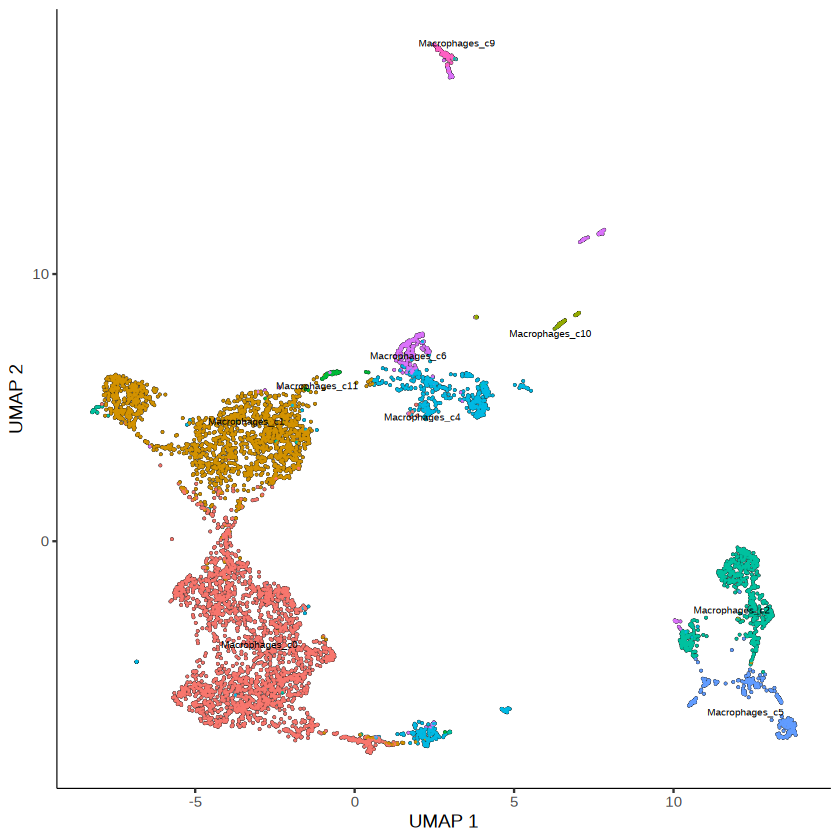

In [11]:
cds <- reduce_dimension(cds)
plot_cells(cds, label_groups_by_cluster=FALSE,  color_cells_by = "celltype")

In [70]:
# sub_cds <- cds[, colData(cds)$celltype %in% c("Macrophages_c5", "Macrophages_c2")]

In [2]:
cds = qread("/home/guoliming/Brown/ALI_Gaoji/sc_bulk_analysis_Epithelial/6_monocle2/Macrophages_pseudotime.qs")

In [87]:
# options(repr.plot.width=6, repr.plot.height=6)  # 单位英寸
pdf("maerk_Clec4e.pdf",width = 8,height = 8)
ciliated_genes <- c("Clec4e")

p <- plot_cells(cds,cell_size=0.8,
           genes=ciliated_genes,
           label_cell_groups=FALSE,
           show_trajectory_graph=FALSE)

p + theme(
  legend.title = element_text(size=16),   # 图例标题
  legend.text = element_text(size=16),    # 图例文本
  axis.text = element_text(size=20),      # 坐标轴文本
  axis.title = element_text(size=20),      # 坐标轴标题
plot.title  = element_text(size = 20, hjust = 1), # 主标题
)& 
  NoAxes() &  
  theme(
    legend.title   = element_text(size = 16),   # 图例标题
    legend.text    = element_text(size = 16),   # 图例文字
    legend.key.size = unit(1, "cm")
  )
dev.off()

agg_record_777286576 
                   2

In [25]:
library(patchwork)  # 或 cowplot

pdf("maerk_M1.pdf", width = 20, height = 12)
ciliated_genes <- c("Nos2","Arg1","Mrc1","Cd86","Cxcl9","Cxcl10","Chil3","Cd163")

plots <- lapply(ciliated_genes, function(g) {
  plot_cells(
    cds,
    genes = g,
    cell_size = 0.8,
    label_cell_groups = FALSE,
    show_trajectory_graph = FALSE
  ) + 
    theme(
      legend.title   = element_text(size=16),
      legend.text    = element_text(size=16),
      axis.text      = element_text(size=16),
      axis.title     = element_text(size=16),
      plot.title     = element_blank(),       # 去掉标题
      legend.key.size = unit(1, "cm")
    ) +
    NoAxes()
})

# 每行4列排版
p <- wrap_plots(plots, ncol = 4)
print(p)

dev.off()


agg_record_573764540 
                   2

In [22]:
pdf("maerk_M1.pdf",width = 12,height = 8)
ciliated_genes <- c("Nos2","Arg1","Mrc1","Cd86","Cxcl9","Cxcl10","Chil3","Cd163")

p <- plot_cells(cds,
           genes=ciliated_genes,cell_size=0.8,
           label_cell_groups=FALSE,
           show_trajectory_graph=FALSE)

p + theme(
  legend.title = element_text(size=16),   # 图例标题
  legend.text = element_text(size=16),    # 图例文本
  axis.text = element_text(size=16),      # 坐标轴文本
  axis.title = element_text(size=16),      # 坐标轴标题
plot.title  = element_text(size = 16), # 主标题
)& 
  NoAxes() &  
  theme(
    legend.title   = element_text(size = 16),   # 图例标题
    legend.text    = element_text(size = 16),   # 图例文字
    legend.key.size = unit(1, "cm")
  )
dev.off()

agg_record_1578978734 
                    2

No trajectory to plot. Has learn_graph() been called yet?



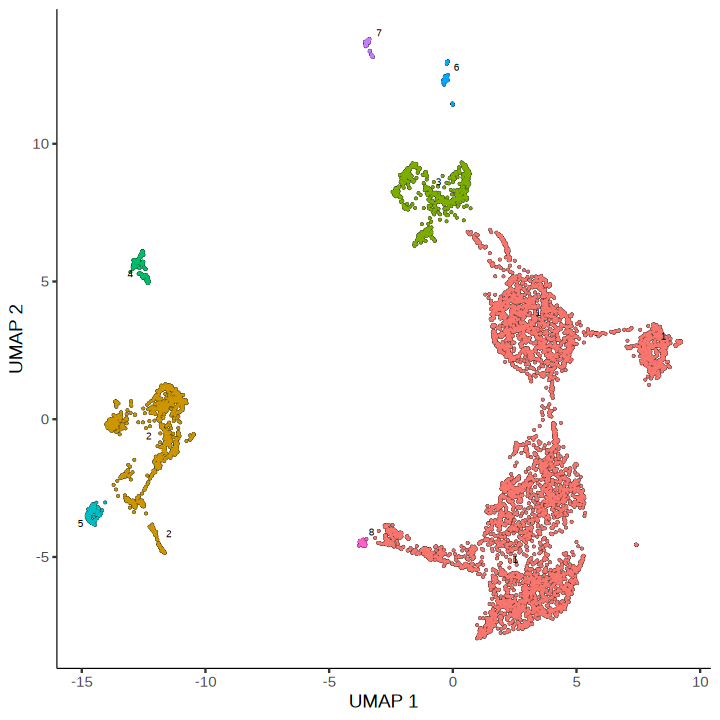

In [39]:
cds <- cluster_cells(cds)
plot_cells(cds, color_cells_by = "partition")

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”


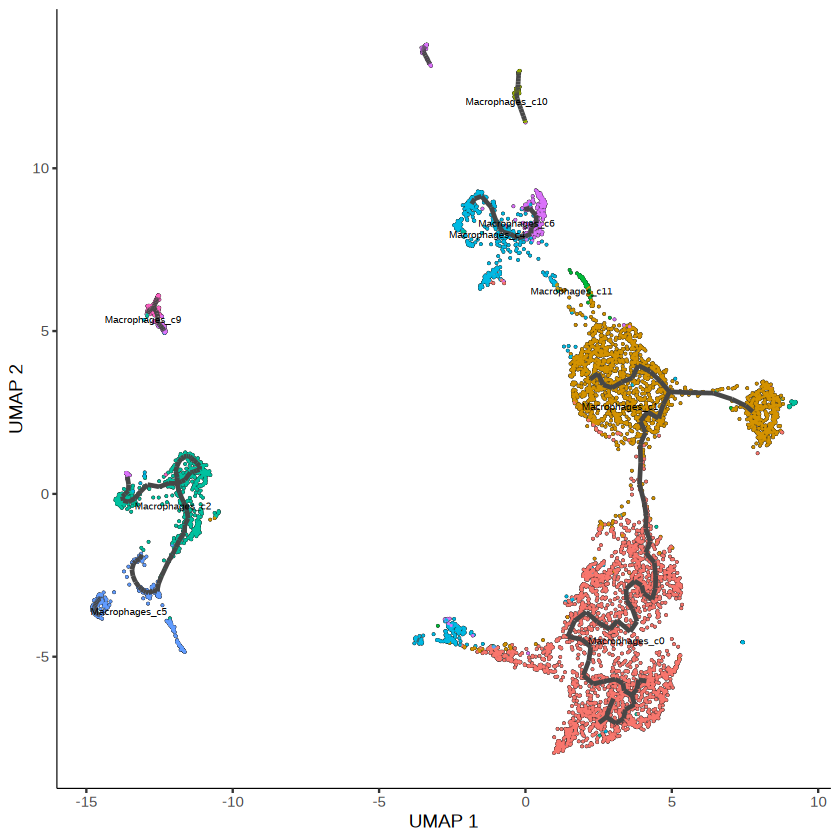

In [3]:
cds <- learn_graph(cds)
plot_cells(cds,
           color_cells_by = "celltype",
           label_groups_by_cluster=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
            trajectory_graph_segment_size = 1)

In [13]:
library(ggplot2)

pdf("Macrophages_pseudotime_celltype.pdf", width=8, height=8)
p <- plot_cells(cds,
                color_cells_by = "celltype",cell_size=0.8,
                label_groups_by_cluster=FALSE,
                label_leaves=FALSE,
                label_branch_points=FALSE,
                # graph_label_size=20,
                trajectory_graph_segment_size = 1.5)  # 节点标签字体

p + theme(
  legend.title = element_text(size=16),   # 图例标题
  legend.text = element_text(size=16),    # 图例文本
  axis.text = element_text(size=16),      # 坐标轴文本
  axis.title = element_text(size=16),      # 坐标轴标题
      # legend.title   = element_text(size = 16),   # 图例标题
    # legend.text    = element_text(size = 16)   # 图例文字
     
)& NoAxes()

dev.off()

agg_record_1453353298 
                    2

In [42]:
table(colData(cds)$celltype)


 Macrophages_c0  Macrophages_c1 Macrophages_c10 Macrophages_c11  Macrophages_c2 
           2388            1772              69              51             672 
 Macrophages_c4  Macrophages_c5  Macrophages_c6  Macrophages_c9 
            621             320             261              91 

In [15]:
# a helper function to identify the root principal points:
get_earliest_principal_node <- function(cds, time_bin="Macrophages_c5"){
  cell_ids <- which(colData(cds)[, "celltype"] == time_bin)
  
  closest_vertex <-
  cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(cds), ])
  root_pr_nodes <-
  igraph::V(principal_graph(cds)[["UMAP"]])$name[as.numeric(names
  (which.max(table(closest_vertex[cell_ids,]))))]
  
  root_pr_nodes
}
cds <- order_cells(cds, root_pr_nodes=get_earliest_principal_node(cds))

In [17]:
# options(repr.plot.width=6, repr.plot.height=6)  # 单位英寸
pdf("Macrophages_pseudotime_5.pdf",width = 10,height = 8)
p <- plot_cells(cds,
           color_cells_by = "pseudotime",cell_size=0.8,
           label_cell_groups=TRUE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
           graph_label_size=4,trajectory_graph_segment_size = 1.5)
p + theme(
  legend.title = element_text(size=16),   # 图例标题
  legend.text = element_text(size=16),    # 图例文本
  axis.text = element_text(size=16),      # 坐标轴文本
  axis.title = element_text(size=16),      # 坐标轴标题
      # legend.title   = element_text(size = 16),   # 图例标题
    # legend.text    = element_text(size = 16)   # 图例文字
) & 
  NoAxes() &  
  theme(
    legend.title   = element_text(size = 16),   # 图例标题
    legend.text    = element_text(size = 16),   # 图例文字
  )
dev.off()

Cells aren't colored in a way that allows them to be grouped.



agg_record_1403862112 
                    2

In [45]:
cds

class: cell_data_set 
dim: 34329 6245 
metadata(2): cds_version citations
assays(1): counts
rownames(34329): Xkr4 Gm1992 ... 4933409K07Rik AC149090.1
rowData names(1): gene_short_name
colnames(6245): GSM8504081_AAACCCACAGGCAATG-1
  GSM8504081_AAACCCATCAATGCAC-1 ... GSM8863172_TTTGGAGCAGAGAGGG-1
  GSM8863172_TTTGGTTTCACTTCTA-1
colData names(20): orig.ident nCount_RNA ... celltype Size_Factor
reducedDimNames(2): PCA UMAP
mainExpName: NULL
altExpNames(0):

In [46]:
qsave(cds,"Macrophages_pseudotime.qs")

In [47]:
ssss

ERROR: Error: object 'ssss' not found


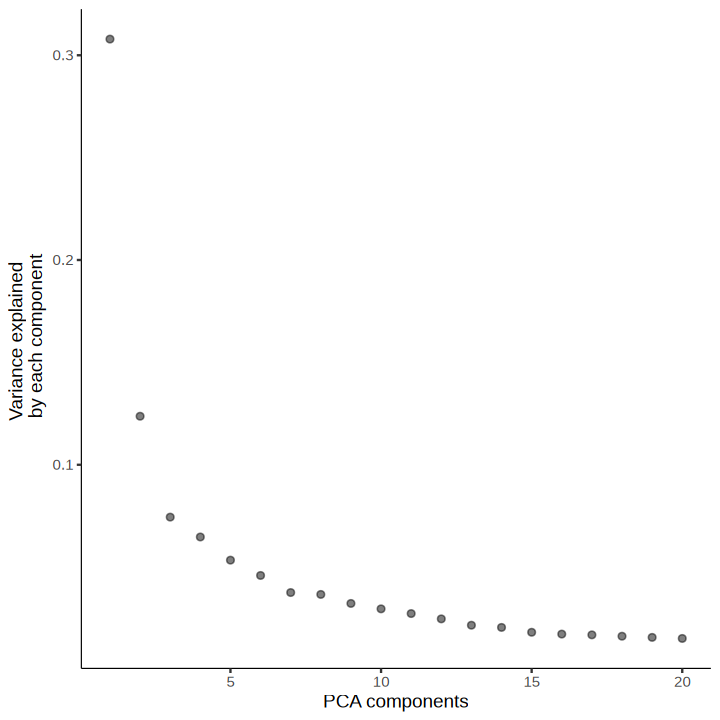

In [ ]:
# 归一化/预处理数据
cds <- preprocess_cds(cds, num_dim = 20)
# 这个函数用于确认设定的dim数是否足够代表主要变异
plot_pc_variance_explained(cds)
 
 
# 降维聚类，可选择UMAP、PCA或者TSNE
cds <- reduce_dimension(cds,reduction_method='UMAP',
                        preprocess_method = 'PCA')
cds <- cluster_cells(cds,reduction_method="UMAP") #cluster your cells

In [ ]:
# 轨迹推断
cds <- learn_graph(cds,verbose=T,
                       use_partition=T, #默认是T，T时是顾及全局的情况
)
 


nn_control: 

    method: NA

    metric: NA

set_nn_control: call stack: IRkernel::main() => kernel$run() => handle_shell() => executor$execute() => tryCatch() => tryCatchList() => tryCatchOne() => doTryCatch() => tryCatchList() => tryCatchOne() => doTryCatch() => evaluate() => withRestarts() => withRestartList() => withOneRestart() => doWithOneRestart() => withRestartList() => withOneRestart() => doWithOneRestart() => with_handlers() => eval() => eval() => withCallingHandlers() => withVisible() => eval() => eval() => learn_graph() => set_nn_control()

  nn_control: 

    method: annoy

    metric: euclidean

    n_trees: 50

    search_k: 2500

    cores: 1

    grain_size: 1

Processing partition component 1

Current partition is 1

Using 218 nodes for principal graph

Finding kNN with 25 neighbors

set_nn_control: call stack: IRkernel::main() => kernel$run() => handle_shell() => executor$execute() => tryCatch() => tryCatchList() => tryCatchOne() => doTryCatch() => tryCatchList() =>

make_nn_index: build time 0.50 seconds.

set_nn_control: call stack: IRkernel::main() => kernel$run() => handle_shell() => executor$execute() => tryCatch() => tryCatchList() => tryCatchOne() => doTryCatch() => tryCatchList() => tryCatchOne() => doTryCatch() => evaluate() => withRestarts() => withRestartList() => withOneRestart() => doWithOneRestart() => withRestartList() => withOneRestart() => doWithOneRestart() => with_handlers() => eval() => eval() => withCallingHandlers() => withVisible() => eval() => eval() => learn_graph() => tryCatch() => tryCatchList() => tryCatchOne() => doTryCatch() => multi_component_RGE() => search_nn_matrix() => tryCatch() => tryCatchList() => tryCatchOne() => doTryCatch() => search_nn_index() => set_nn_control()

  nn_control: 

    method: annoy

    metric: euclidean

    n_trees: NA

    search_k: 2500

    cores: 1

    grain_size: 1

search_nn_index:

  k: 25

  nn_control: 

    method: annoy

    metric: euclidean

    n_trees: NA

    search_k: 250

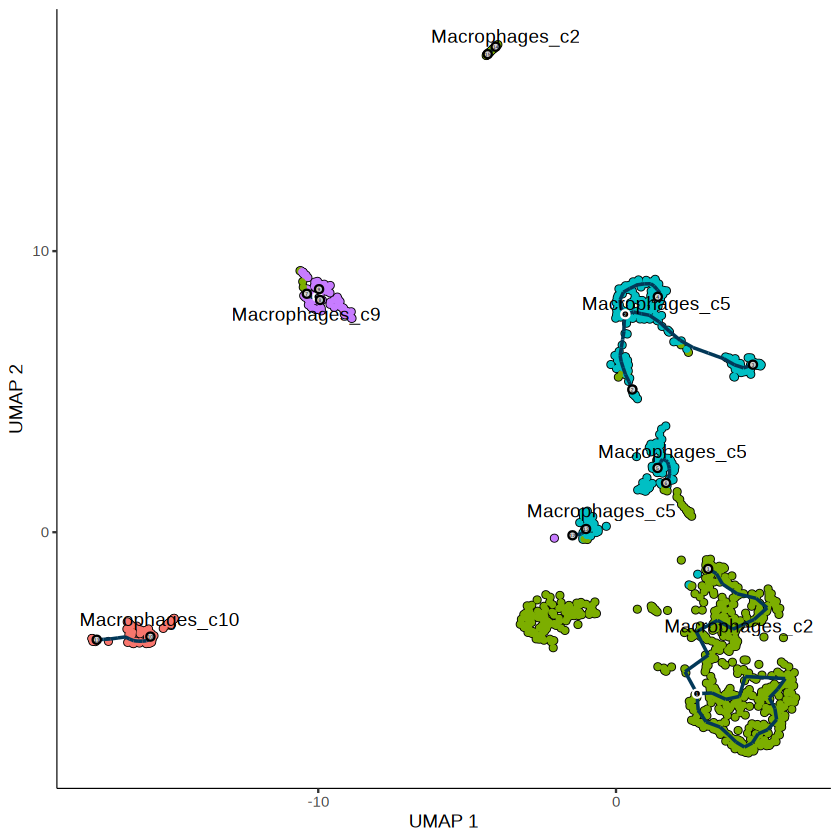

In [ ]:
plot_cells(cds, reduction_method="UMAP",
           color_cells_by = 'celltype',
        #    label_groups_by_cluster=FALSE,
           cell_size=1,group_label_size=4,
           trajectory_graph_color='#023858',
           graph_label_size = 1
        #    trajectory_graph_segment_size = 1
           )

In [ ]:
root_cells <- colnames(cds)[cds$celltype == "Macrophages_c5"]
cds <- order_cells(cds, root_cells = root_cells)

Cells aren't colored in a way that allows them to be grouped.



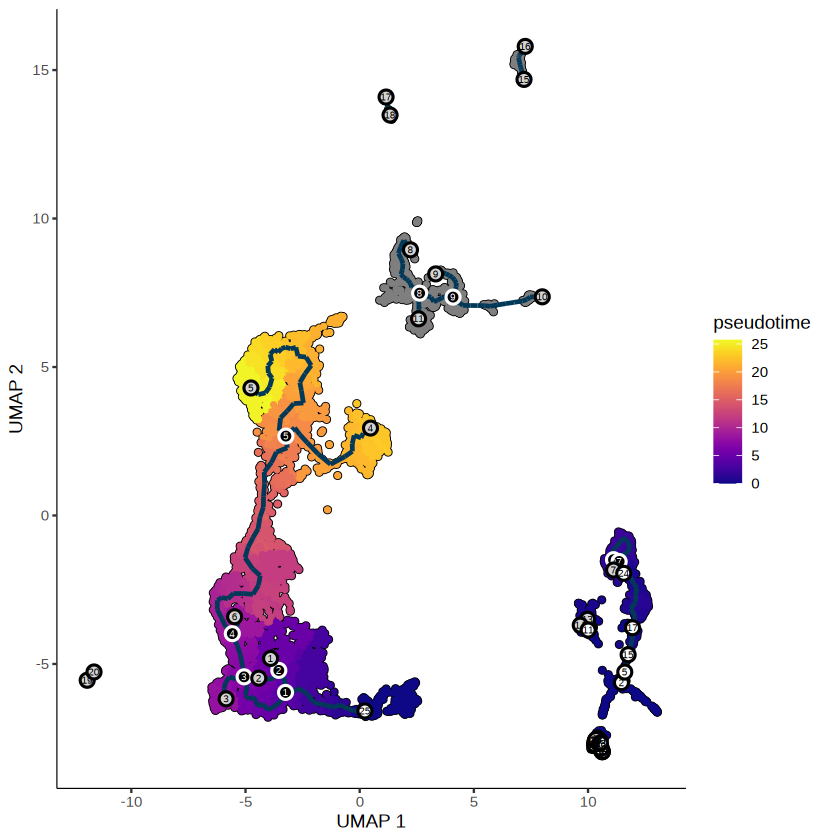

In [ ]:
# 定义root cell, 推断拟时方向
# 结合先验知识自定(示例数据)
# cds <- order_cells(cds,root_cells = "Macrophages_c1") 
 
# 可视化
plot_cells(cds, 
           color_cells_by = "pseudotime", 
        #    label_groups_by_cluster=TRUE,
           cell_size=1,group_label_size=4,
           trajectory_graph_color='#023858',
           trajectory_graph_segment_size = 1)

In [ ]:
# 提取不同轨迹的差异基因/并选择前12个
# neighbor_graph="principal_graph"提取轨迹上相似位置是否有相关的表达
trace_genes <- graph_test(cds, 
                          neighbor_graph = "principal_graph", 
                          cores = 4)
 


In [ ]:
track_genes_sig <- trace_genes %>%
  filter(q_value < 0.05) %>%        # 先筛选显著基因
  top_n(n = 12, morans_I) %>%       # 再取 morans_I 排名前12
  pull(gene_short_name) %>%
  as.character()


In [ ]:
track_genes_sig

[1] "Gnb2l1"    "Rnasek"    "Cmss1"     "Atp6v0c"   "Sem1"      "Rack1"    
 [7] "Ndufb1-ps" "Atp5mpl"   "Erbin"     "Lrmda"     "Selenok"   "Elob"

In [ ]:
sub_cds = cds[colData(cds)$celltype %in% c("Macrophages_c2",
                                                   "Macrophages_c9",
                                                   "Macrophages_c10")]

Cells aren't colored in a way that allows them to be grouped.



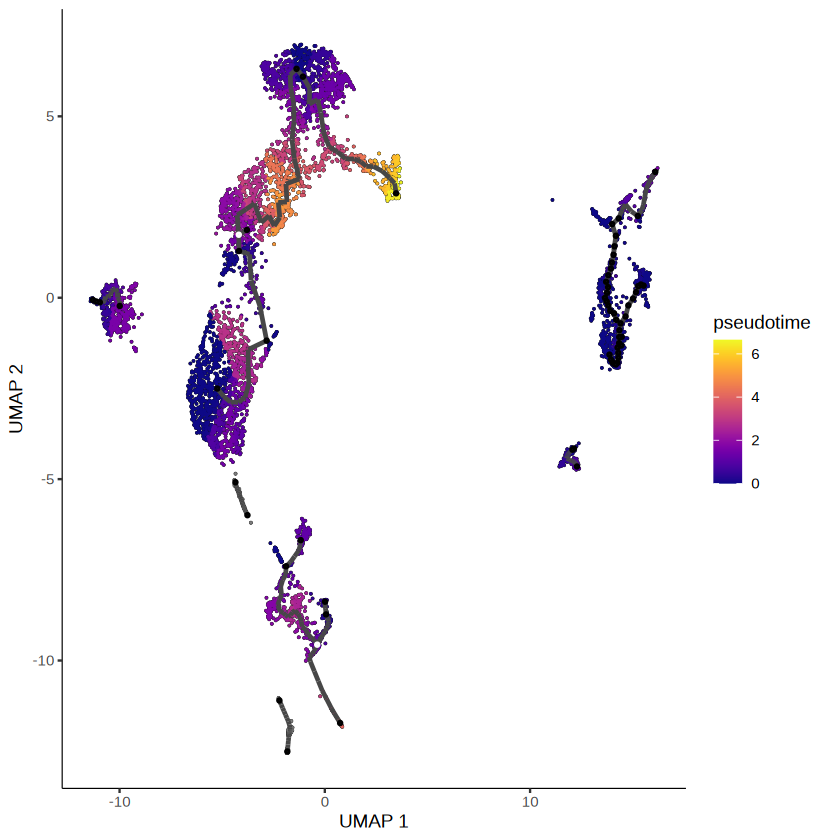

In [ ]:
# 定义root cell, 推断拟时方向
# 结合先验知识自定(示例数据)
# sub_cds <- order_cells(sub_cds,root_cells = "Macrophages_c2") 
 
# 可视化
plot_cells(sub_cds, 
            label_cell_groups = TRUE, 
           color_cells_by = "pseudotime", 
           label_branch_points = TRUE, 
           graph_label_size = 0, 
        #    cell_size=2, 
        #    trajectory_graph_color='black',
           trajectory_graph_segment_size = 1
           )

In [ ]:
track_genes_sig <- trace_genes %>%
  top_n(n=12, morans_I) %>%
  pull(gene_short_name) %>%
  as.character()
 
# 差异基因绘制
levels(Idents(scRNA)) #打出来细胞类型供复制
# [1] "CD4+ T-cells"      "Fibroblasts"       "B-cells"          
# [4] "CD8+ T-cells"      "Neutrophils"       "Monocytes"        
# [7] "Adipocytes"        "NK cells"          "Endothelial cells"
 
lineage_cds <- cds[rowData(cds)$gene_short_name %in% track_genes_sig,
                      colData(cds)$celltype %in% c("Macrophages_c2",
                                                   "Macrophages_c9",
                                                   "Macrophages_c10")]
#lineage_cds <- order_cells(lineage_cds)
plot_genes_in_pseudotime(lineage_cds,
                         color_cells_by="celltype",
                         min_expr=0.5)
 
# 细胞映射
plot_cells(cds, genes= track_genes_sig,
           cell_size=1, 
           show_trajectory_graph=FALSE,
           label_cell_groups=FALSE,
           label_leaves=FALSE)